# Simulación Estocástica
## Tarea Nº 02

Alonso Ogueda Oliva

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Seet seed for reproducibility
np.random.seed(42)

In [3]:
def laplace_icdf(u, alpha=1):
    f_inv_u = - 1.0 / alpha * np.sign(u - .5) * np.log(1 - 2 * np.abs(u - .5))
    return f_inv_u

def rlaplace(n, alpha=1):
    unif = np.random.uniform(low=0.0, high=1.0, size=n)
    laplace = laplace_icdf(unif, alpha=alpha)
    return laplace

In [4]:
# sns.set(rc={'figure.figsize':(600, 400)})


In [5]:
n = 1000
laplace = rlaplace(n, alpha=1)
# fig, ax = plt.subplots(figsize=(600, 400))
# sns.distplot(laplace);

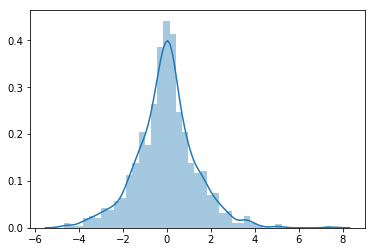

In [6]:
sns.distplot(laplace);

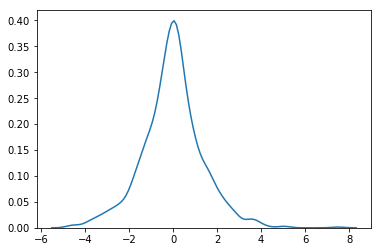

In [7]:
sns.kdeplot(laplace)

/home/alonsolml/miniconda3/envs/stats/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


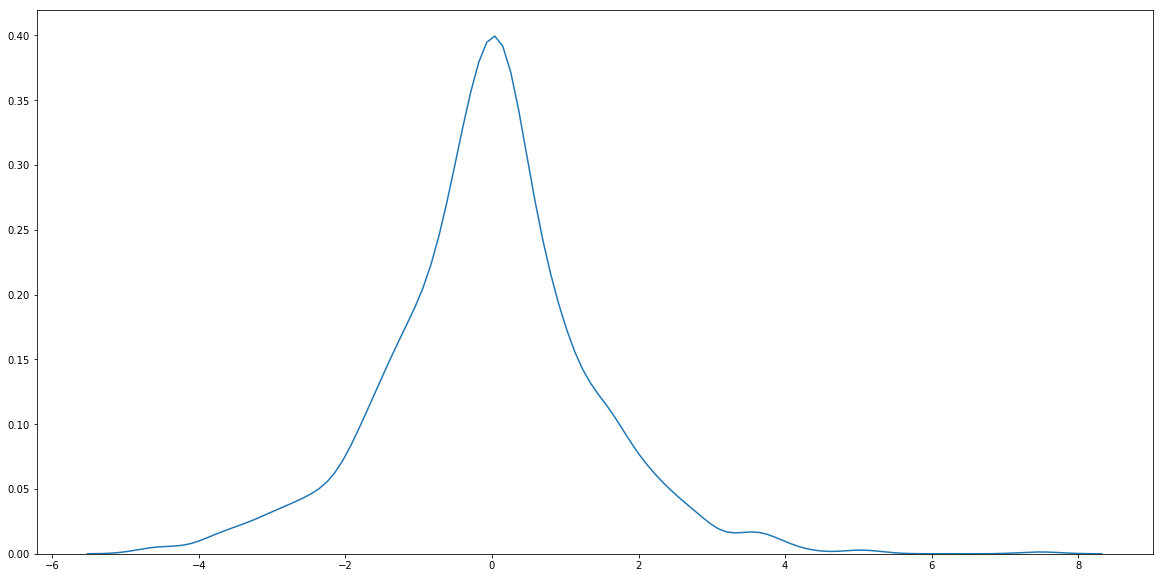

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.kdeplot(laplace)
fig.show()

In [10]:
# u = np.random.uniform(low=0.0, high=1.0, size=10000)
# laplace_x = laplace_icdf(u)
# df = pd.DataFrame({"uniform": u, "laplace": laplace_x})

In [11]:
# ax = df.plot.kde()

In [12]:
# df[["uniform"]].plot.kde();

In [13]:
# df[["laplace"]].plot.kde();